***Distance measures in cosmology by David W. Hogg***

 - formulae for many different cosmological distance measures are provided
 

In [1]:
import astropy.io.fits as fits
from os import system
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import scipy.integrate as si 
import healpy as hp
from math import sqrt, cos, sin, tan, pi, acos, asin, atan, sinh, pow, log, asinh
import numpy.fft as fft
import time
import numpy.random as ran
from astropy import units, cosmology
from astropy import constants as const
from astropy import units, cosmology
from astropy.cosmology import default_cosmology
from astropy.cosmology import FlatLambdaCDM
#from astropy.cosmology import WMAP9 as cosmo

In [2]:
#H0 = 70. #presente day Hubble rate (h.km.s^-1.mpc-1)
#c = 2.99792458E5 # speed of light (km/s)
#G = 6.67428E-11 #gravitational constant (m^3.s^-2.kg^-1)
c = const.c.to('km/s')
print(c)
G = const.G
print(G)
kiloparsec = const.kpc #3.08567758149E19 #kiloparsec (m)
print(kiloparsec)
megaparsec = 3.08567758149E22 #megaparsec (m)
# H0 = 100 * h # (km s^-1 Mpc^-1)
#solar_mass = 2E30 #heliocentric_gravit_const/gravit_const_SI #solar mass (kg)
solar_mass = const.M_sun
print(solar_mass)

299792.458 km / s
  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018
  Name   = Kiloparsec
  Value  = 3.0856775814913675e+19
  Uncertainty  = 0.0
  Unit  = m
  Reference = Derived from au + IAU 2015 Resolution B 2 note [4]
  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


***Cosmological Parameters***

Hubble constant $H_0$ is the ratio between Recession speed(v) and distance(d) in the expanding Universe. (“0” refers to the present epoch)

\begin{equation}
v = H_0 d  
\end{equation}

Hubble time $t_H$ is the inverse of the Hubble constant $H_0$.

\begin{equation}
t_H = 1 / H_0  
\end{equation}

Hubble distance $D_H$ is the the speed of light (c) times the Hubble time ($t_H$)

\begin{equation}
D_H = c / H_0  
\end{equation}

Dimensionless density parameters:

\begin{equation}
\Omega_{\Lambda} = \frac{\Lambda c^2} {3 H_0^2 }
\end{equation}

\begin{equation}
\Omega_m = \frac{8 \pi G \rho_0}{3 H_0^2}
\end{equation}

A third density parameter $\Omega_k$ measures the “curvature of space”
\begin{equation}
\Omega_m + \Omega_{\Lambda} + \Omega_k = 1
\end{equation}

If $\Omega_{\Lambda}$ = 0, then the deceleration parameter $q_0$ is just half $\Omega_m $, otherwise $q_0$ is not such a useful parameter.

In [3]:
#cosmo = default_cosmology.get()
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
print(cosmo)
Omega_m0 = cosmo.Om0
Omega_Lambda0 = cosmo.Ode0
#print(Omega_Lambda0)
#cosmo.kpc_proper_per_arcmin(3)  

Omega_k0 =  0
H0 = cosmo.H(0) #at z = 0
#H0.value, H0.unit  
#H0 = 67.7 # km / (Mpc s)
#mpc2km = 3.086E+19
#km2mpc = 3.24078e-20
h = H0/100
D_H = (c/H0).to(units.km) #hubble distante in km
t_H = (1 / H0) #hubble time in seconds
print('hubble distance in Km: ', D_H)
#print('hubble time in seconds: ', t_H.to(units.s))
print('hubble time in years: ', t_H.to(units.yr))

def set_model(model = 'Einstein–de-Sitter'):
    global Omega_m0
    global Omega_Lambda0
    global Omega_k0
    if (model == 'Einstein–de-Sitter'):
        Omega_m0 = 1
        Omega_Lambda0 = 0
        Omega_k0= 1 - Omega_m0 - Omega_Lambda0
    if (model == 'low-density'):
        Omega_m0 = 0.05
        Omega_Lambda0 = 0
        Omega_k0= 1 - Omega_m0 - Omega_Lambda0
    if (model == 'high-lambda'):
        Omega_m0 = 0.2
        Omega_Lambda0 = 0.8
        Omega_k0= 1 - Omega_m0 - Omega_Lambda0


FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=None)
hubble distance in Km:  1.3215183810725603e+23 km
hubble time in years:  13968460309.72556 yr


***Cosmological constant Lamba ($\Lambda$)***
 - From Equation (6)

\begin{equation}
\Lambda = \frac{3 H_0^2 \Omega_{\Lambda}}{c^2}  
\end{equation}


In [4]:
#cosmological constant Lamba
Lambda= 3 * ((H0/c) ** 2) * Omega_Lambda0
print(Lambda)


1.1447774726145685e-07 1 / Mpc2


**Mass Density of University ($\rho_0$)**
 - From Equation (5)

\begin{equation}
\rho_0 = \frac{3 H_0^2 \Omega_m}{8 \pi G}  
\end{equation}



In [5]:
#mass density of universe
rho_0 =  3 * (H0**2) * Omega_m0 / (8 * np.pi * G)
#rho_0 = rho_0 * 1.0503e-39  # in kg/m^3
print(rho_0)


2629014649608.4175 kg km2 / (m3 Mpc2)


**Redshift (z)**

Redshift of an object is the ratio fractional doppler shift of its emitted light resulting from radial motion:

\begin{equation}
 z \equiv \frac{v_e}{v_o} - 1 = \frac{\lambda_o}{\lambda_e} - 1 
\end{equation}

$v_o$ & $\lambda_o$ are the observed frequency ane wavelength and $v_e$ & $\lambda_e$ are emitted.

In Special relativity:
\begin{equation}
 1+z = \sqrt{\frac{1 + \frac{v}{c}}{1 - \frac{v}{c}}}
\end{equation}

NOTE: redshift is directly observable and radial velocity is not.

The difference between an object’s measured redshift $z_{obs}$ and its cosmological redshift $z_{cos}$ is due to its (radial) peculiar velocity $v_{pec}$.

Peculiar Velocity (derived from above equation by taking derivative):
\begin{equation}
   v_{pec} = c \frac{(z_{obs} - z_{cos})}{(1+z)}  
\end{equation}
    assumed $v_{pec}$ << c.

Notes:
1. From now on, z = $z_{cos}$

2. For small v/c, or small distance d, in the expanding Universe, the velocity is linearly proportional to the distance.
\begin{equation}
   z \approx \frac{v}{c} = \frac{d}{D_H}
\end{equation}
   Equation is only true for small redshifts!
3. Many galaxy redshift surveys, when presenting redshifts as radial velocities, always use the non-relativistic approximation v = cz, even when it may not be physically appropriate.

The cosmological redshift is directly related to the scale factor a(t), or the “size” of the Universe.
\begin{equation}
 1+z_{12} = \frac{a(t_1)}{a(t_2)} = \frac{1+z_2}{1+z_1}
\end{equation}

In [6]:

#recession speed
#v = H0 * d #where d is the distance in expanding universe

#c=t_H =D_H =1

#Redshift z & radial velocity v
# 1+z = sqrt((1+ v/c)/(1- v/c))
#Velocity to relativistic redshift
def vel2z(v):
    val = v / c
    doppler_factor = np.sqrt((1 + val) / (1 - val))
    return  (doppler_factor - 1)
# For small v/c, or small distance d, the velocity is linearly proportional to the distance

#value = cosmo.luminosity_distance(z)
#print (value)

#relativistic redshift to a velocity
def z2v(z):
    zp = (1 + z) ** 2
    return (c * (zp - 1) / (zp + 1))

#object’s measured redshift z_obs
#cosmological redshift z_cos

**Comoving Distance (Line-of-sight)**

A small comoving distance $\delta DC$ between two nearby objects in the Universe is the distance between them which remains constant with epoch if the two objects are moving with the Hubble flow.

The total line-of-sight comoving distance DC from us to a distant object is computed by integrating the infinitesimal $\delta DC$ contributions between nearby events along the radial ray from z = 0 to the object.

normalized Hubble expansion rate at reshift $z$:
\begin{equation}
E(z) = \sqrt{\Omega_{m,0} (1+z)^3 + \Omega_{\kappa, 0} (1+z)^2 + \Omega_{\Lambda,0}}
\end{equation}

Hubble constant at redshift z:
\begin{equation}
H(z) = H_0 E(z)
\end{equation}

The total line-of-sight comoving distance is
\begin{equation}
DC = DH  \int_{0}^{z} \frac{dz'}{E(z')} \,
\end{equation}


In [7]:
def E_z(z, w=None):
    if w is not None:
        w = w
        #print(w)
    else:
        w = -1.
    zp1 = 1.0+z
    return np.sqrt(Omega_m0*zp1**3.0 + Omega_k0*zp1**2.0 + Omega_Lambda0*(1+z)**(1.+w))

def Ez(z):
    zp1 = 1.0+z
    return np.sqrt(Omega_m0*zp1**3.0 + Omega_k0*zp1**2.0 + Omega_Lambda0) # if w is not in cosmo

def Hubble_Distance(z):
    DH =  (c/(H0*E_z(z))).to(units.km) 
    #DH = D_H / E_z(z)
    #print (H_z)
    return DH

#Computes the line of sight comoving distance from redshifts z0 to z
def comovingDistance(z, z0 = 0, w=None):
    if w is not None:
        w = w
        #print(w)
    else:
        w = -1.
        #print (w)
    #DC = D_H * si.quad(lambda z: (1/E_z(z)), z0, z)
    DC = Hubble_Distance(0.) * si.quad(lambda z: (1/E_z(z)), z0, z)
    #print (DC[0])
    return DC[0].to(units.pc)



**Traverse Comoving distance**

The comoving distance between two events at the same redshift or distance but separated on the sky by some angle $\delta \theta$ is DM $\delta \theta$ and the transverse comoving distance DM is simply related to the line-of-sight comoving distance DC:


$D_M = \left\{
\begin{array}{ c l }
D_H \frac{1}{\sqrt{\lvert \Omega_{\kappa} \lvert}} sinh \left[\sqrt{\lvert \Omega_{\kappa} \lvert} \frac{D_C}{D_H} \right] & \quad for \quad \Omega_{\kappa}>0,\\
D_C & \quad for \quad \Omega_{\kappa}=0, \\
D_H \frac{1}{\sqrt{\lvert \Omega_{\kappa} \lvert}} sin \left[\sqrt{\lvert \Omega_{\kappa} \lvert} \frac{D_C}{D_H} \right] & \quad for \quad \Omega_{\kappa}<0
\end{array}
\right.$

where the trigonometric functions sinh and sin account for what is called “the curvature of space.

For $\Omega_{\Lambda} = 0$, The solution is:
\begin{equation}
D_M = D_H  \frac{2 [ 2 - \Omega_m (1-z) - (2 - \Omega_m) \sqrt{1 + \Omega_m z} ] }{\Omega_m^2 (1+z)}
\end{equation}


In [8]:
# Computes transverse comoving distance
def traverse_comovingDistance(z):
    #print(Omega_Lambda0)
    DC = comovingDistance(z)
    if(Omega_k0==0.0) :
        return DC
    sqrt_Omk0 = sqrt(np.abs(Omega_k0))
    #angle = sqrt_Omk0 * DC/D_H
    angle = sqrt_Omk0 * DC/Hubble_Distance(0)
    #factor = D_H / sqrt_Omk0
    factor = Hubble_Distance(0) / sqrt_Omk0
    DM = 1.
    if (Omega_k0 > 0.):
        DM = factor * sinh(angle)
    if (Omega_k0 < 0.):
        DM = factor * sin(angle)
    return DM

In [9]:
print ("Comoving Distance", comovingDistance(6))
print ("Traverse Comoving Distance", traverse_comovingDistance(6))

Comoving Distance 8247384688.539825 pc
Traverse Comoving Distance 8247384688.539825 pc


In [10]:
# for Omega_Lambda0 = 0., Computes transverse comoving distance
def proper_traverse_comovingDistance(z):
    sqr_OmM0 = Omega_m0**2
    reg = sqrt(1 + (Omega_m0*z))
    numerator = 2 * (2 - (Omega_m0 * (1-z)) -((2-Omega_m0) * reg))
    denominator = sqr_OmM0 * (1+z)
    return (D_H * numerator/denominator).to(units.pc)


In [11]:
print ("Proper Traverse Comoving Distance", proper_traverse_comovingDistance(6))

Proper Traverse Comoving Distance 8910238506.077759 pc


Dm/Dh:  3.835473369516019e-14 pc / km


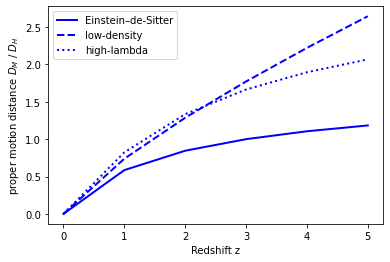

In [12]:
#z = [0, 1, 2, 3, 4, 5]
z = np.linspace(0.,5,6)
set_model(model = 'Einstein–de-Sitter')
DH = Hubble_Distance(0)
#Proper motion distance DM/D_H
PD = []
"""
PD.append(traverse_comovingDistance(0)/D_H)
PD.append(traverse_comovingDistance(1)/D_H)
PD.append(traverse_comovingDistance(2)/D_H)
PD.append(traverse_comovingDistance(3)/D_H)
PD.append(traverse_comovingDistance(4)/D_H)
PD.append(traverse_comovingDistance(5)/D_H)
"""
PD.append(traverse_comovingDistance(0)/DH)
PD.append(traverse_comovingDistance(1)/DH)
PD.append(traverse_comovingDistance(2)/DH)
PD.append(traverse_comovingDistance(3)/DH)
PD.append(traverse_comovingDistance(4)/DH)
PD.append(traverse_comovingDistance(5)/DH)
print ('Dm/Dh: ', PD[5])

set_model(model = 'low-density')

PD1 = []
"""
PD1.append(traverse_comovingDistance(0)/D_H)
PD1.append(traverse_comovingDistance(1)/D_H)
PD1.append(traverse_comovingDistance(2)/D_H)
PD1.append(traverse_comovingDistance(3)/D_H)
PD1.append(traverse_comovingDistance(4)/D_H)
PD1.append(traverse_comovingDistance(5)/D_H)
"""
PD1.append(traverse_comovingDistance(0)/DH)
PD1.append(traverse_comovingDistance(1)/DH)
PD1.append(traverse_comovingDistance(2)/DH)
PD1.append(traverse_comovingDistance(3)/DH)
PD1.append(traverse_comovingDistance(4)/DH)
PD1.append(traverse_comovingDistance(5)/DH)

set_model(model = 'high-lambda')

PD2 = []
PD2.append(traverse_comovingDistance(0)/D_H)
PD2.append(traverse_comovingDistance(1)/D_H)
PD2.append(traverse_comovingDistance(2)/D_H)
PD2.append(traverse_comovingDistance(3)/D_H)
PD2.append(traverse_comovingDistance(4)/D_H)
PD2.append(traverse_comovingDistance(5)/D_H)

PD = np.array(PD)
PD1 = np.array(PD1)
PD2 = np.array(PD2)
z = np.array(z)

#Plotting z and DM
plt.plot(z, PD, 'b-', linewidth=2)
plt.plot(z, PD1, 'b--', linewidth=2)
plt.plot(z, PD2, 'b', linewidth=2, linestyle='dotted')
# naming the x axis
plt.xlabel('Redshift z')
# naming the y axis
plt.ylabel('proper motion distance $D_M$ / $D_H$')
plt.legend(["Einstein–de-Sitter", "low-density", "high-lambda"])
# function to show the plot
plt.show()

**Angular Diameter Distance**

The angular diameter distance $D_A$ is defined as the ratio of an object’s physical transverse size to its angular size (in radians).

\begin{equation}
D_A = \frac{D_M}{(1+z)}
\end{equation}

Angular diameter distance $D_{A_{12}}$ between two objects at redshifts $z_1$ and $z_2$, frequently used in gravitational lensing.

It is not found by subtracting the two individual angular diameter distances! The correct formula (not correct for $\Omega_k < 0$), for $\Omega_k ≥ 0$, is
\begin{equation}
D_{A_{12}} = \frac{1}{(1+z_2)} [D_M2 \sqrt{1 + \Omega_k \frac{D_M1^2}{D_H^2}} - D_M1 \sqrt{1 + \Omega_k \frac{D_M2^2}{D_H^2}}]
\end{equation}

where $D_{M1}$ and $D_{M2}$ are the transverse comoving distances to $z_1$ and $z_2$



In [13]:
def angular_diameter_distance(z, z0 = 0):
    dm = traverse_comovingDistance(z)
    if (z0 == 0):
        return dm/(1+z)
    dm_ = traverse_comovingDistance(z0)
    dh = Hubble_Distance(0.)
    #val1 = dm_ * sqrt(1. + Omega_k0 * (dm/D_H)**2.) 
    #val2 = dm * sqrt(1. + Omega_k0 * (dm/D_H)**2.)
    val1 = dm_ * sqrt(1. + Omega_k0 * (dm/dh)**2.) 
    val2 = dm * sqrt(1. + Omega_k0 * (dm/dh)**2.)
    DA = (val1-val2)/(1+z) # only true for Omega_k >= 0
    return DA

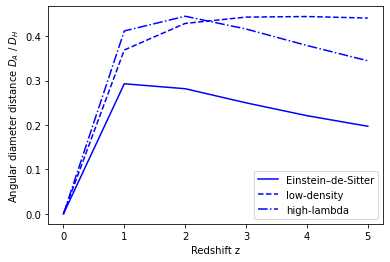

In [14]:
set_model(model = 'Einstein–de-Sitter')
DH = Hubble_Distance(0)
#Proper motion distance DM/D_H
PD = []
"""
PD.append(angular_diameter_distance(0)/D_H)
PD.append(angular_diameter_distance(1)/D_H)
PD.append(angular_diameter_distance(2)/D_H)
PD.append(angular_diameter_distance(3)/D_H)
PD.append(angular_diameter_distance(4)/D_H)
PD.append(angular_diameter_distance(5)/D_H)
"""
PD.append(angular_diameter_distance(0)/DH)
PD.append(angular_diameter_distance(1)/DH)
PD.append(angular_diameter_distance(2)/DH)
PD.append(angular_diameter_distance(3)/DH)
PD.append(angular_diameter_distance(4)/DH)
PD.append(angular_diameter_distance(5)/DH)
#print ('DA/Dh: ', PD[5])

set_model(model = 'low-density')

PD1 = []
"""
PD1.append(angular_diameter_distance(0)/D_H)
PD1.append(angular_diameter_distance(1)/D_H)
PD1.append(angular_diameter_distance(2)/D_H)
PD1.append(angular_diameter_distance(3)/D_H)
PD1.append(angular_diameter_distance(4)/D_H)
PD1.append(angular_diameter_distance(5)/D_H)
"""
PD1.append(angular_diameter_distance(0)/DH)
PD1.append(angular_diameter_distance(1)/DH)
PD1.append(angular_diameter_distance(2)/DH)
PD1.append(angular_diameter_distance(3)/DH)
PD1.append(angular_diameter_distance(4)/DH)
PD1.append(angular_diameter_distance(5)/DH)

set_model(model = 'high-lambda')

PD2 = []
PD2.append(angular_diameter_distance(0)/DH)
PD2.append(angular_diameter_distance(1)/DH)
PD2.append(angular_diameter_distance(2)/DH)
PD2.append(angular_diameter_distance(3)/DH)
PD2.append(angular_diameter_distance(4)/DH)
PD2.append(angular_diameter_distance(5)/DH)

PD = np.array(PD)
PD1 = np.array(PD1)
PD2 = np.array(PD2)
z = np.array(z)

#Plotting z and DM
plt.plot(z, PD, 'b-')
plt.plot(z, PD1, 'b--')
plt.plot(z, PD2, 'b-.')
# naming the x axis
plt.xlabel('Redshift z')
# naming the y axis
plt.ylabel('Angular diameter distance $D_A$ / $D_H$')
plt.legend(["Einstein–de-Sitter", "low-density", "high-lambda"])
# function to show the plot
plt.show()

**Luminosity Distance**

The luminosity distance DL is defined by the relationship between bolometric (ie, integrated over all frequencies) flux S and bolometric luminosity L.

\begin{equation}
D_L = \sqrt{ \frac{L}{4 \pi S} } = (1+z)D_M = (1+z)^2 D_A
\end{equation}

where $D_M$ is transverse comoving distance and $D_A$ is angular diameter distance.

**Distance Modulus**

\begin{equation}
D_M = 5 log ( \frac{D_L}{10 pc} )
\end{equation}

It is the magnitude difference between an object’s observed bolometric flux and what it would be if it were at 10 pc (this was once thought to be the distance to Vega).


In [15]:
def luminosityDistance(z):
    Da = angular_diameter_distance(z)
    return Da * (1+z)**2


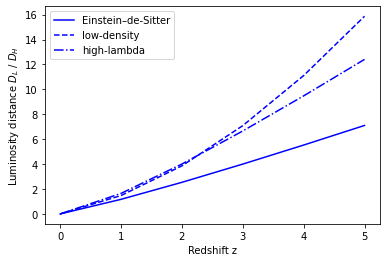

In [16]:
set_model(model = 'Einstein–de-Sitter')
DH = Hubble_Distance(0)
#Proper motion distance DM/D_H
PD = []

PD.append(luminosityDistance(0)/DH)
PD.append(luminosityDistance(1)/DH)
PD.append(luminosityDistance(2)/DH)
PD.append(luminosityDistance(3)/DH)
PD.append(luminosityDistance(4)/DH)
PD.append(luminosityDistance(5)/DH)
#print ('DA/Dh: ', PD[5])

set_model(model = 'low-density')

PD1 = []

PD1.append(luminosityDistance(0)/DH)
PD1.append(luminosityDistance(1)/DH)
PD1.append(luminosityDistance(2)/DH)
PD1.append(luminosityDistance(3)/DH)
PD1.append(luminosityDistance(4)/DH)
PD1.append(luminosityDistance(5)/DH)

set_model(model = 'high-lambda')

PD2 = []
PD2.append(luminosityDistance(0)/DH)
PD2.append(luminosityDistance(1)/DH)
PD2.append(luminosityDistance(2)/DH)
PD2.append(luminosityDistance(3)/DH)
PD2.append(luminosityDistance(4)/DH)
PD2.append(luminosityDistance(5)/DH)

PD = np.array(PD)
PD1 = np.array(PD1)
PD2 = np.array(PD2)
z = np.array(z)

#Plotting z and DM
plt.plot(z, PD, 'b-')
plt.plot(z, PD1, 'b--')
plt.plot(z, PD2, 'b-.')
# naming the x axis
plt.xlabel('Redshift z')
# naming the y axis
plt.ylabel('Luminosity distance $D_L$ / $D_H$')
plt.legend(["Einstein–de-Sitter", "low-density", "high-lambda"])
# function to show the plot
plt.show()

**Comoving Volume**

The comoving volume $V_C$ is the volume measure in which number densities of non-evolving objects locked into Hubble flow are constant with redshift.

\begin{equation}
dV_C = D_H \frac{(1+z)^2 D_A^2}{E(z)} d\Omega dz
\end{equation}

where $D_A$ is the angular diameter distance at redshift z, $d\Omega$ is solid angle and redshift interval $dz$.

The integral of the comoving volume element from the present to redshift z gives the total comoving volume, all-sky, out to redshift z

$V_C = \left\{
\begin{array}{ c l }
(\frac{4 \pi D_H^3}{2 \Omega_k}) \left [\frac{D_M}{D_H} \sqrt{1 + \Omega_k \frac{D_M^2}{D_H^2}} - \frac{1}{\sqrt{\lvert \Omega_{\kappa} \lvert}} arcsinh (\sqrt{\lvert \Omega_{\kappa} \lvert} \frac{D_M}{D_H}) \right] & \quad for \quad \Omega_{\kappa}>0,\\
\frac{4 \pi }{3} D_M^3 & \quad for \quad \Omega_{\kappa}=0, \\
(\frac{4 \pi D_H^3}{2 \Omega_k}) \left [\frac{D_M}{D_H} \sqrt{1 + \Omega_k \frac{D_M^2}{D_H^2}} - \frac{1}{\sqrt{\lvert \Omega_{\kappa} \lvert}} arcsin (\sqrt{\lvert \Omega_{\kappa} \lvert} \frac{D_M}{D_H}) \right] & \quad for \quad \Omega_{\kappa}<0
\end{array}
\right.$

$D_H^3$ is sometimes called the Hubble volum^.

In [17]:
def diff_comovingVolume(z):
    da = angular_diameter_distance(z)
    ez = Ez(z)
    dh = Hubble_Distance(0)
    return dh* ((1+z)*da)**2 / ez

def comovingVolume(z):
    dm = traverse_comovingDistance(z)
    flatV = 4. * np.pi * dm**3. / 3. # Omega_k0=0
    if(Omega_k0==0.0) :
        return flatV
    sqrt_Omk0 = sqrt(np.abs(Omega_k0))
    angle = sqrt_Omk0 * dm/Hubble_Distance(0)
    reg1 = 4. * np.pi * Hubble_Distance(0)**3. / (2. * Omega_k0)
    reg2 = (dm/Hubble_Distance(0))*np.sqrt(1. + Omega_k0 * (dm/Hubble_Distance(0))**2.)
    Vc= 1.
    if (Omega_k0 > 0.):
        Vc = reg1 * (reg2 - asinh(angle))
    if (Omega_k0 < 0.):
        Vc = reg1 * (reg2 - asin(angle))
    return Vc

#print(comovingVolume(6))



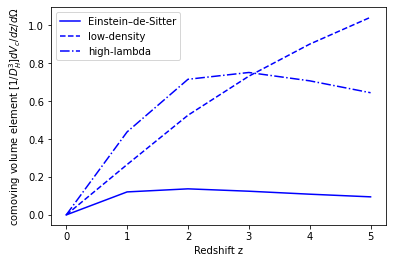

In [18]:
set_model(model = 'Einstein–de-Sitter')
dh = Hubble_Distance(0)
dh3 = dh**3
PD = []

PD.append(diff_comovingVolume(0.)/dh3)
PD.append(diff_comovingVolume(1.)/dh3)
PD.append(diff_comovingVolume(2.)/dh3)
PD.append(diff_comovingVolume(3.)/dh3)
PD.append(diff_comovingVolume(4.)/dh3)
PD.append(diff_comovingVolume(5.)/dh3)

set_model(model = 'low-density')
PD1 = []

PD1.append(diff_comovingVolume(0.)/dh3)
PD1.append(diff_comovingVolume(1.)/dh3)
PD1.append(diff_comovingVolume(2.)/dh3)
PD1.append(diff_comovingVolume(3.)/dh3)
PD1.append(diff_comovingVolume(4.)/dh3)
PD1.append(diff_comovingVolume(5.)/dh3)

set_model(model = 'high-lambda')

PD2 = []

PD2.append(diff_comovingVolume(0.)/dh3)
PD2.append(diff_comovingVolume(1.)/dh3)
PD2.append(diff_comovingVolume(2.)/dh3)
PD2.append(diff_comovingVolume(3.)/dh3)
PD2.append(diff_comovingVolume(4.)/dh3)
PD2.append(diff_comovingVolume(5.)/dh3)


PD = np.array(PD)
PD1 = np.array(PD1)
PD2 = np.array(PD2)
z = np.array(z)

#Plotting z and DM
plt.plot(z, PD, 'b-')
plt.plot(z, PD1, 'b--')
plt.plot(z, PD2, 'b-.')
# naming the x axis
plt.xlabel('Redshift z')
# naming the y axis
plt.ylabel('comoving volume element $[ 1 / D_H^3] dV_c/dz/d\Omega $')
plt.legend(["Einstein–de-Sitter", "low-density", "high-lambda"])
# function to show the plot
plt.show()

**Lookback Time**

The lookback time $t_L$ to an object is the difference between the age to of the Universe now (at observation) and the age te of the Universe at the time the photons were emitted (according to the object).
It is used to predict properties of high-redshift objects with evolutionary models, such as passive stellar evolution for galaxies.


\begin{equation}
t_l = t_H \int_{0}^{z} \frac{1}{(1+z') E(z')} \,dz'
\end{equation}



In [19]:
def lookbackTime(z, z0=0):
    lt = t_H * si.quad(lambda z: (1/((1+z)*Ez(z))), z0, z)
    #print('Ez: ', Ez(z))
    #print('t_H: ', t_H)
    #print('Look back time: ', lt)
    return lt.to(units.s)

#lookbackTime(1.)

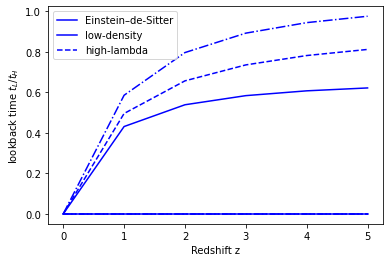

In [20]:
set_model(model = 'Einstein–de-Sitter')

PD = []

PD.append(lookbackTime(0.)/t_H.to(units.s))
PD.append(lookbackTime(1.)/t_H.to(units.s))
PD.append(lookbackTime(2.)/t_H.to(units.s))
PD.append(lookbackTime(3.)/t_H.to(units.s))
PD.append(lookbackTime(4.)/t_H.to(units.s))
PD.append(lookbackTime(5.)/t_H.to(units.s))

set_model(model = 'low-density')
PD1 = []

PD1.append(lookbackTime(0.)/t_H.to(units.s))
PD1.append(lookbackTime(1.)/t_H.to(units.s))
PD1.append(lookbackTime(2.)/t_H.to(units.s))
PD1.append(lookbackTime(3.)/t_H.to(units.s))
PD1.append(lookbackTime(4.)/t_H.to(units.s))
PD1.append(lookbackTime(5.)/t_H.to(units.s))

set_model(model = 'high-lambda')

PD2 = []

PD2.append(lookbackTime(0.)/t_H.to(units.s))
PD2.append(lookbackTime(1.)/t_H.to(units.s))
PD2.append(lookbackTime(2.)/t_H.to(units.s))
PD2.append(lookbackTime(3.)/t_H.to(units.s))
PD2.append(lookbackTime(4.)/t_H.to(units.s))
PD2.append(lookbackTime(5.)/t_H.to(units.s))


PD = np.array(PD)
PD1 = np.array(PD1)
PD2 = np.array(PD2)
z = np.array(z)

#Plotting z and DM
plt.plot(z, PD, 'b-')
plt.plot(z, PD1, 'b--')
plt.plot(z, PD2, 'b-.')
# naming the x axis
plt.xlabel('Redshift z')
# naming the y axis
plt.ylabel('lookback time $t_L / t_H$')
plt.legend(["Einstein–de-Sitter", "low-density", "high-lambda"])
# function to show the plot
plt.show()

**Probability of intersecting objects**

The incremental probability $dP$ that a line of sight will intersect one of the objects in redshift interval $dz$ at redshift z is 


\begin{equation}
dP = n(z) \sigma(z) D_H \frac{(1+z)^2}{E(z)} dz
\end{equation}